1. Explain what data set your team had chosen for the project.
2. Explain the main features in the data that you are studying and why.
3. Include code that demonstrates some of the data cleaning your group has attempted. Some examples
including handling missingness and imputation.
4. Include code that at least one exploratory data analysis (EDA) technique you have applied to your
data and why. An example EDA could be one to help determine predictors for a response variable for
simple linear regression.

1. The dataset our team chose is the Spotify track information.
2. The main features in the data that we are studying is the relationships among track genre and other variables in the dataset.

In [35]:
# load the dataset
import pandas as pd
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [36]:
print(df.shape[0])
df.dropna(inplace=True) # remove all rows with missing values
print(df.shape[0])
print(df.isnull().sum())


# look for duplicate values based on track name and artist name
df.drop_duplicates(subset=['track_name', 'artists'], inplace=True)
print(df.shape[0])

114000
113999
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
81343


track_genre
acoustic       43.312434
afrobeat       24.584470
alt-rock       39.093985
alternative    34.386555
ambient        44.817503
                 ...    
techno         40.064838
trance         38.937870
trip-hop       34.386760
turkish        40.971731
world-music    41.430682
Name: popularity, Length: 113, dtype: float64
Average popularity in genre k-pop: 59.33489461358314, Number of songs: 854
Average popularity in genre pop-film: 59.12252475247525, Number of songs: 808
Average popularity in genre metal: 56.45070422535211, Number of songs: 213
Average popularity in genre pop: 55.90635451505017, Number of songs: 299
Average popularity in genre chill: 55.145054945054945, Number of songs: 910
Average popularity in genre hip-hop: 52.52503793626707, Number of songs: 659
Average popularity in genre sad: 51.80783582089552, Number of songs: 536
Average popularity in genre latino: 51.174698795180724, Number of songs: 332
Average popularity in genre grunge: 50.56317204301075, Number o

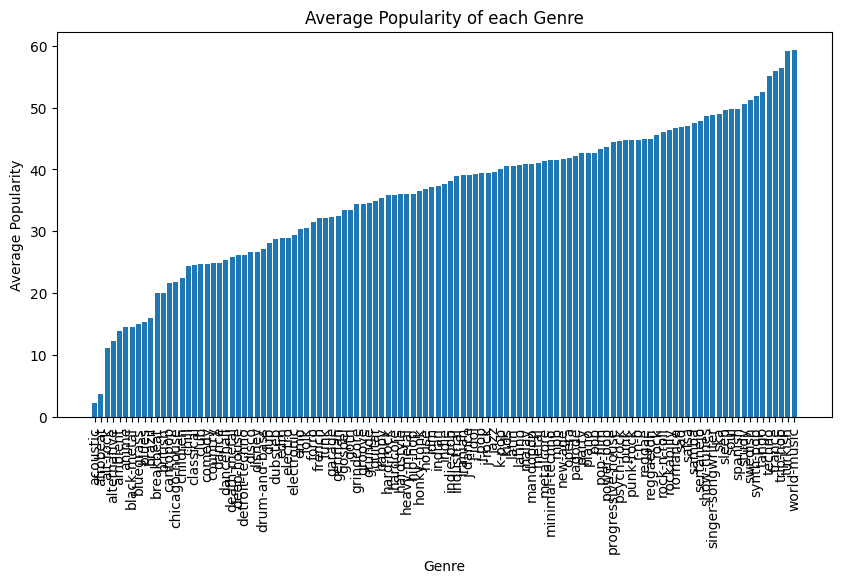

In [38]:
avg_popularity = df.groupby('track_genre')['popularity'].mean()
print(avg_popularity)
# iterate through the top  above and print the number of songs in each genre
for genre in avg_popularity.sort_values(ascending=False).index:
    print(f"Average popularity in genre {genre}: {avg_popularity[genre]}, Number of songs: {df[df['track_genre'] == genre].shape[0]}")

# plot the average popularity of each genre
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(avg_popularity.index, avg_popularity.sort_values())
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of each Genre')
plt.show()
